In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
import skimage
from skimage import io
import cv2
import os

In [3]:
os.getcwd()

'C:\\Texture_detection\\Texture_detection\\research'

In [8]:
patches_df= pd.read_csv('patches2.csv')
patches_df

,Unnamed: 0,X1,X2,Y1,Y2,dissimilarity,correlation,homogeneity,enegy,contrast
0,0,1.0,21.0,1.0,21.0,25.413333,0.416266,0.059664,0.042426,1246.120000
1,1,1.0,21.0,2.0,22.0,26.356667,0.404698,0.055491,0.042492,1352.270000
2,2,1.0,21.0,3.0,23.0,25.840000,0.421481,0.058690,0.042687,1279.940000
3,3,1.0,21.0,4.0,24.0,26.116667,0.405157,0.055162,0.043141,1303.116667
4,4,1.0,21.0,5.0,25.0,27.846667,0.370914,0.052696,0.042817,1478.773333
...,...,...,...,...,...,...,...,...,...,...
94859,94859,329.0,349.0,325.0,345.0,34.863333,-0.012869,0.030732,0.042164,2024.656667
94860,94860,329.0,349.0,326.0,346.0,35.660000,-0.039484,0.025775,0.042361,2073.933333
94861,94861,329.0,349.0,327.0,347.0,36.606667,-0.046150,0.025555,0.042230,2124.633333
94862,94862,329.0,349.0,328.0,348.0,36.980000,-0.095912,0.025349,0.042098,2160.180000


In [5]:
patches_df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [6]:
patches_df.isnull().sum()

diss_sim    0
corr        0
homogen     0
energy      0
contrast    0
asm         0
dtype: int64

In [7]:
# plt.scatter(patches_df.dissimilarity,patches_df['homogeneity'])
# plt.xlabel('dissimilarity')
# plt.ylabel('homogeneity')

AttributeError: 'DataFrame' object has no attribute 'dissimilarity'

In [10]:
# !pip install threadpoolctl==3.1.0

In [11]:
GLCM_df= patches_df.drop(columns=['X1','X2','Y1','Y2'],axis=1)

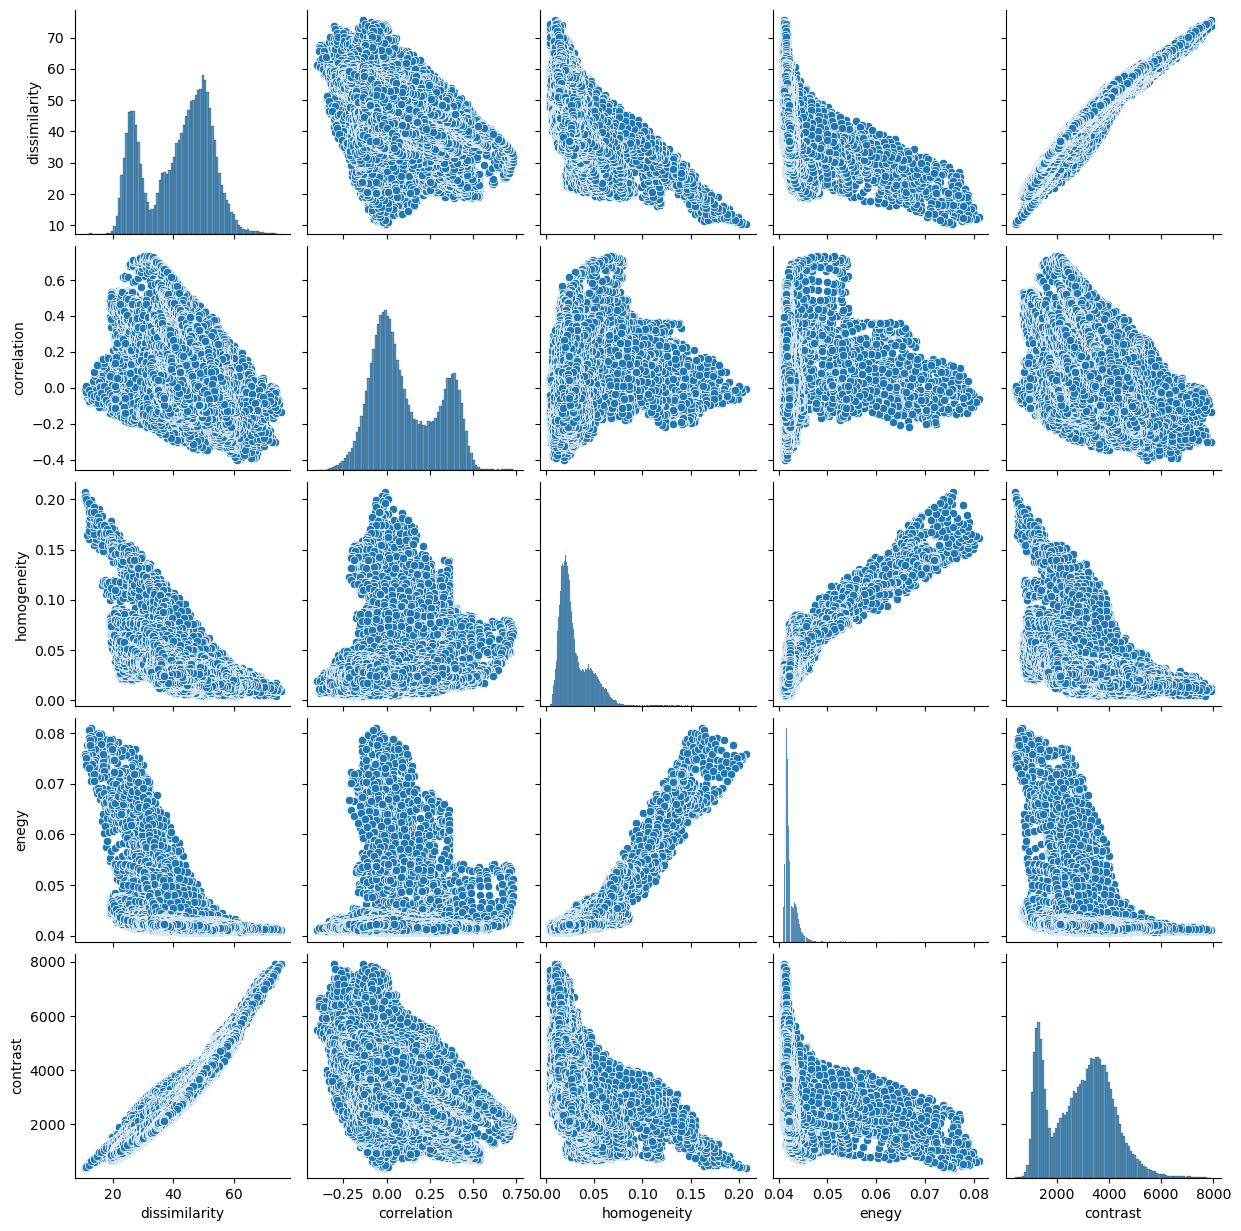

In [12]:
sns.pairplot(GLCM_df)

<Axes: >

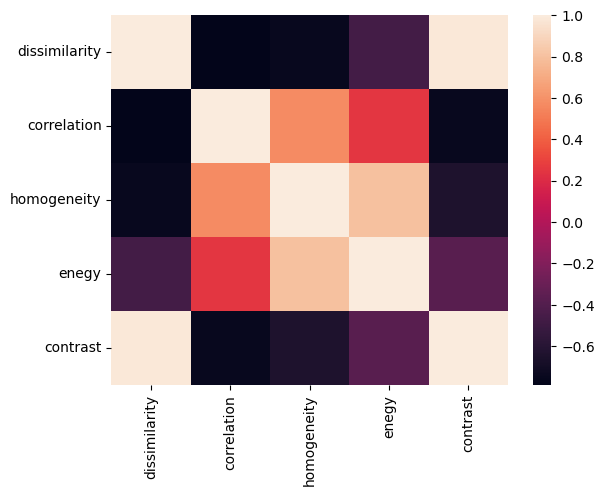

In [13]:
sns.heatmap(GLCM_df.corr())

In [14]:
# Scalling
scaler= MinMaxScaler()
data= scaler.fit_transform(GLCM_df)

Optimal eps value is around a distance of 0.02

In [15]:
# DBScal algorithm
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.02,min_samples=30) #min_samples by thumb rule
model=db.fit(data)
labels= model.labels_
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(data)
labels= kmeans.labels_
np.unique(labels)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 2, 3])

In [18]:
patches_df['label']=labels

In [19]:
patches_df['label'].value_counts()

1    40659
2    36385
3    30147
0     1050
Name: label, dtype: int64

In [20]:
patches_df

,X1,X2,Y1,Y2,dissimilarity,correlation,homogeneity,enegy,contrast,label
0,1,21,1,21,25.413333,0.416266,0.059664,0.042426,1246.120000,3
1,1,21,2,22,26.356667,0.404698,0.055491,0.042492,1352.270000,3
2,1,21,3,23,25.840000,0.421481,0.058690,0.042687,1279.940000,3
3,1,21,4,24,26.116667,0.405157,0.055162,0.043141,1303.116667,3
4,1,21,5,25,27.846667,0.370914,0.052696,0.042817,1478.773333,3
...,...,...,...,...,...,...,...,...,...,...
108236,329,349,325,345,34.863333,-0.012869,0.030732,0.042164,2024.656667,1
108237,329,349,326,346,35.660000,-0.039484,0.025775,0.042361,2073.933333,1
108238,329,349,327,347,36.606667,-0.046150,0.025555,0.042230,2124.633333,1
108239,329,349,328,348,36.980000,-0.095912,0.025349,0.042098,2160.180000,1


In [21]:
patches_df['Xc']=(patches_df['X1']+patches_df['X2'])//2
patches_df['Yc']=(patches_df['Y1']+patches_df['Y2'])//2

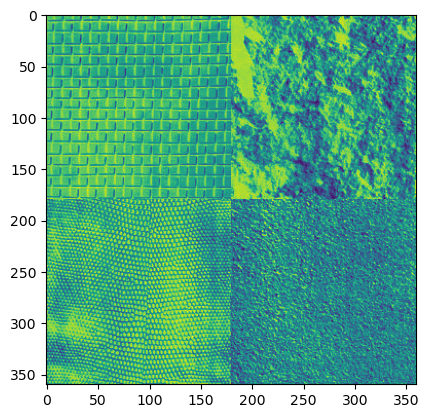

In [26]:
image= io.imread('./Brodatz Texture/0123.jpg')
plt.imshow(image)

In [ ]:
# blank image
blank=np.zeros([340,340,3],dtype='float')
print(blank.shape)

In [ ]:
for i in range(0,len(patches_df)-1): #for x
#     for j in range(i,(340-11)): #for y
        
        if patches_df['label'][i]==0:
            blank[patches_df['Xc'][i]][[patches_df['Yc'][i]]]=(255,0,0)
            
        elif patches_df['label'][i]==1:
            blank[patches_df['Xc'][i]][[patches_df['Yc'][i]]]=(0,255,0)
                                     
        elif patches_df['label'][i]==2:
            blank[patches_df['Xc'][i]][[patches_df['Yc'][i]]]=(0,0,255)
                                     
        else:
            blank[patches_df['Xc'][i]][[patches_df['Yc'][i]]]=(255,0,255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


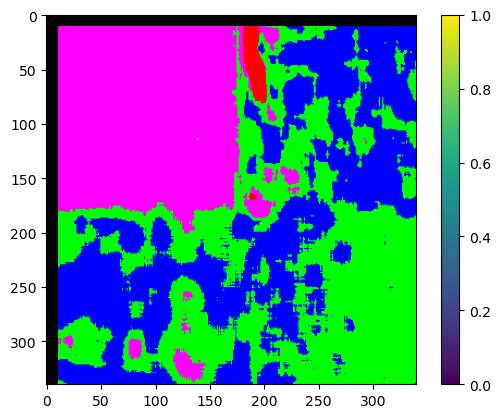

In [159]:
plt.imshow(image)
colour_bar=plt.imshow(blank)
plt.colorbar(colour_bar,)

In [156]:
patches_df['label'].value_counts()

1    40659
2    36385
3    30147
0     1050
Name: label, dtype: int64

In [ ]:

# # Kmeans Elbow method
# from sklearn.cluster import KMeans
# cs = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#     kmeans.fit(data)
#     cs.append(kmeans.inertia_)
# plt.plot(range(1, 11), cs)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('CS')
# plt.show()